<a href="https://colab.research.google.com/github/xinnazim/projects/blob/main/OB4%EC%A1%B0_%EB%B0%A9%ED%95%99%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face expression recognition

In [ ]:
from google.colab import drive
import zipfile
import os

# Google 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ZIP 파일 경로 및 압축 해제될 경로 설정
zip_file_path = '/content/drive/MyDrive/2023-2/archive.zip'  # ZIP 파일 경로
extract_path = 'dataset/'  # 압축 해제될 경로

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
folder_path = "/content/dataset/images/" # 이미지 데이터의 기본 경로

이미지 시각화 및 데이터 살펴보기

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
pic_size = 48

# 특정 감정에 대한 이미지를 시각화하는 함수
def plot_exp(expression):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)

        img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(pic_size, pic_size))

        plt.imshow(img)
    plt.show()

In [ ]:
# 여러 표정에 대한 이미지를 한 번에 시각화하는 함수
def plot_all_expressions(folder_path, expressions):
    for expression in expressions: # 표정 리스트
        print(f"Showing images for: {expression}")
        plot_exp(expression)

Showing images for: happy


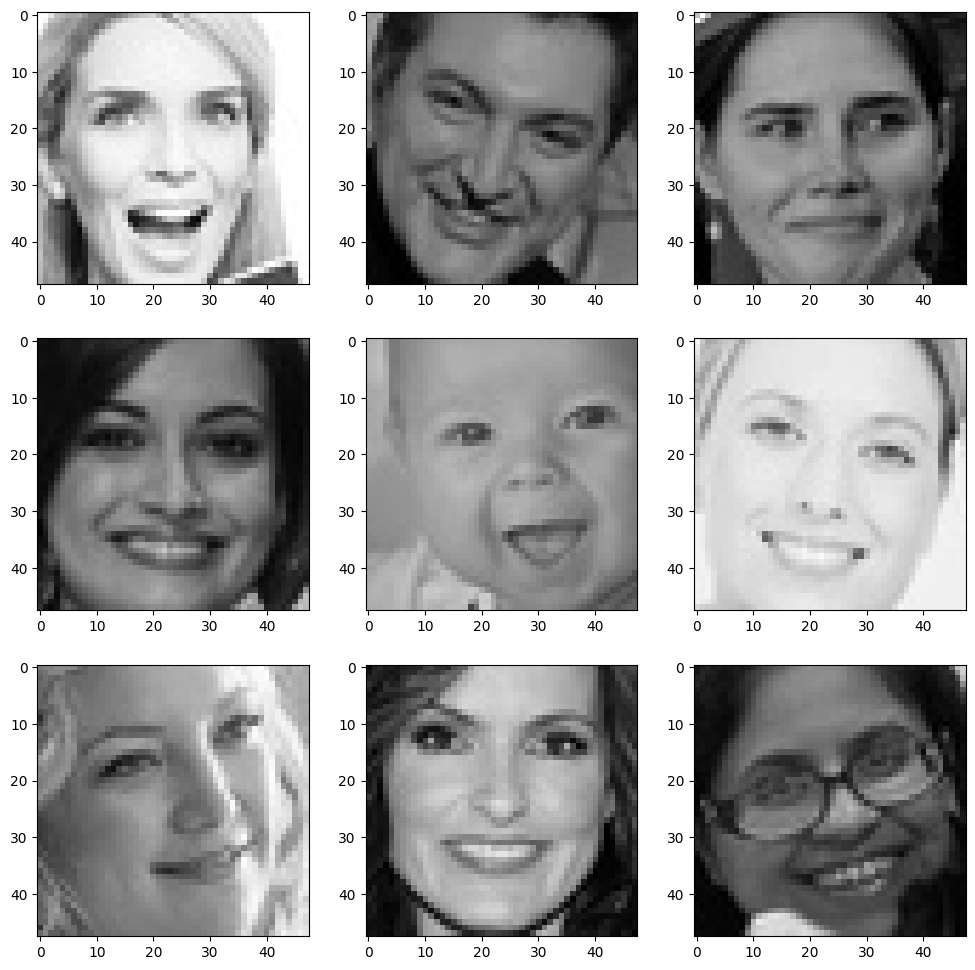

Showing images for: sad


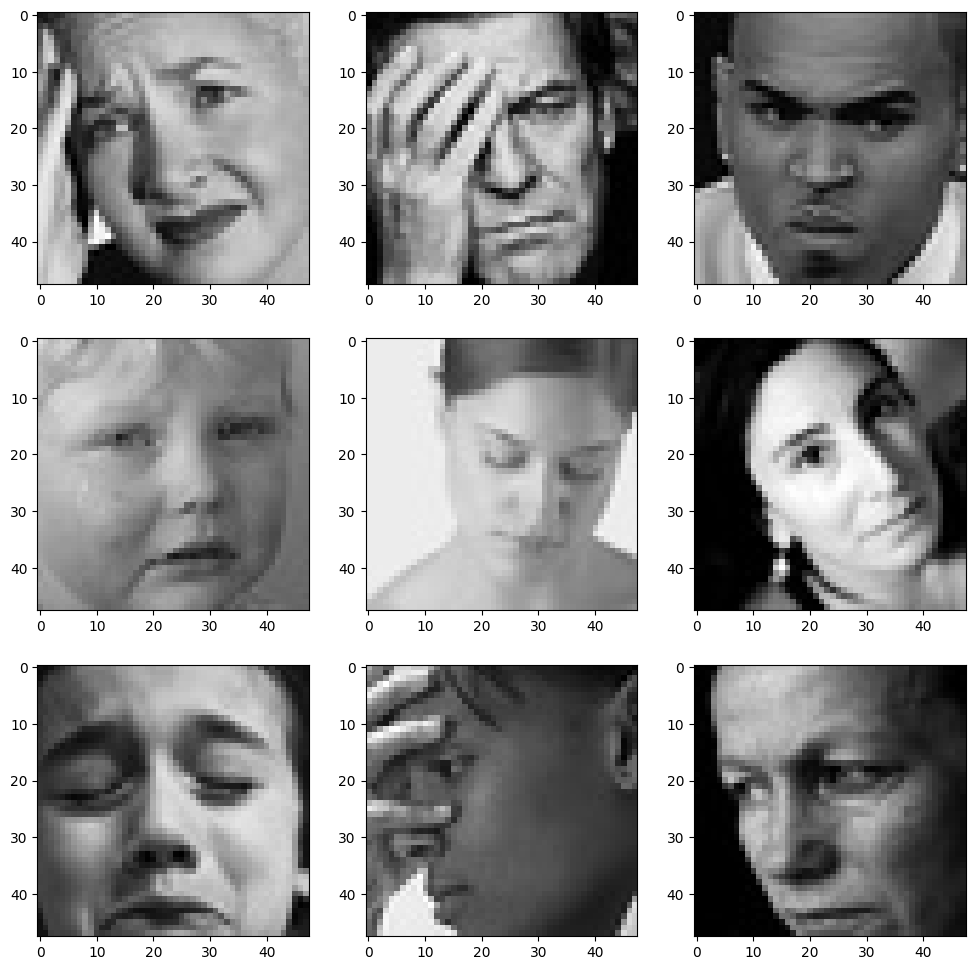

Showing images for: angry


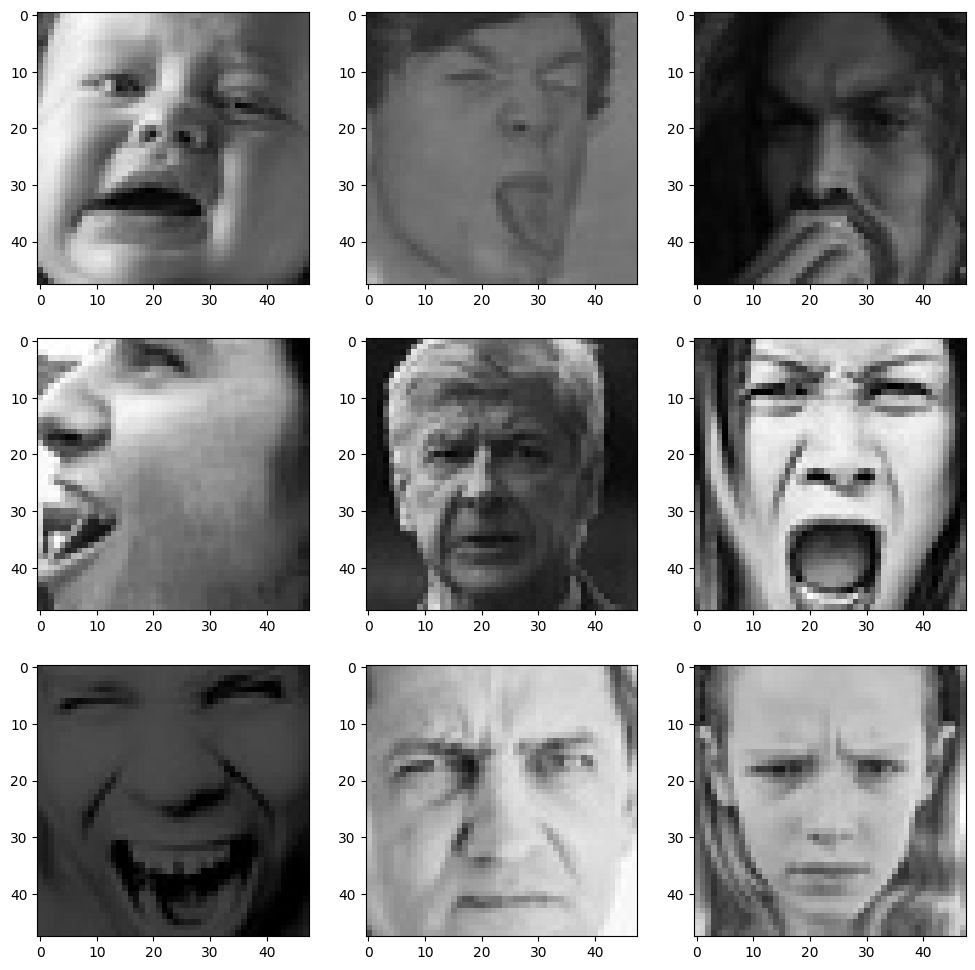

Showing images for: neutral


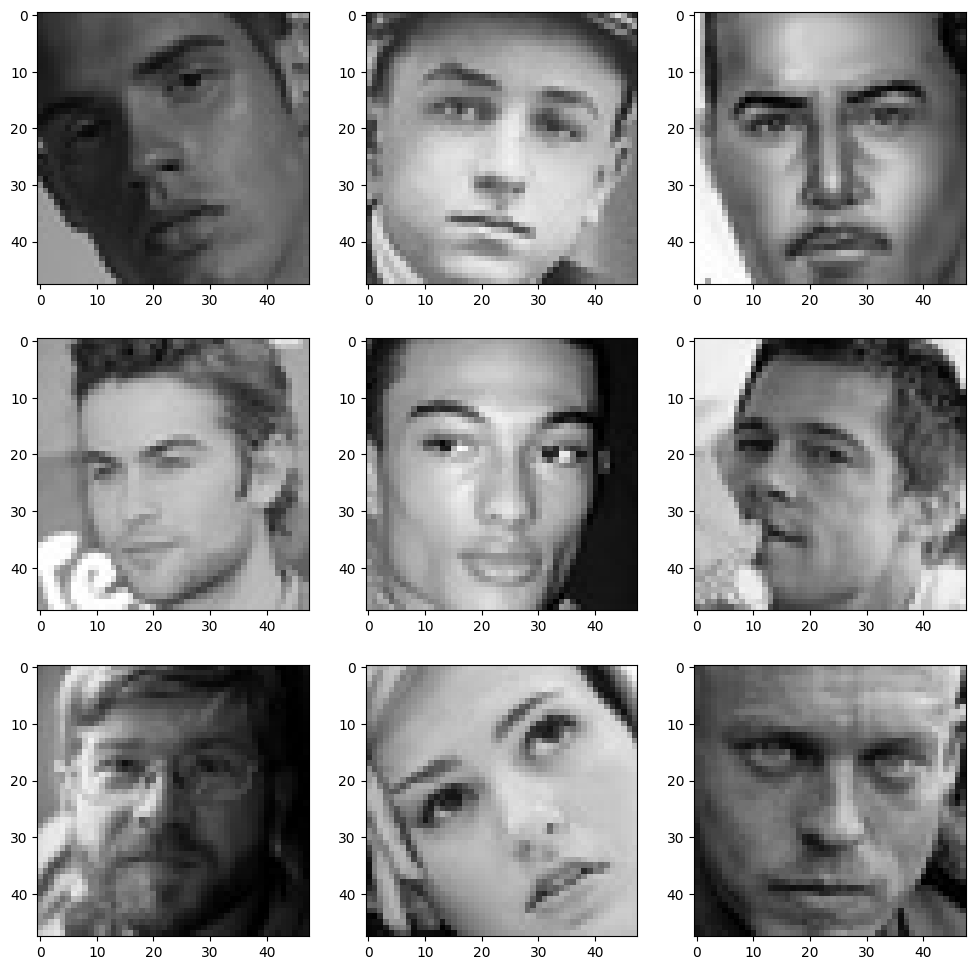

Showing images for: surprise


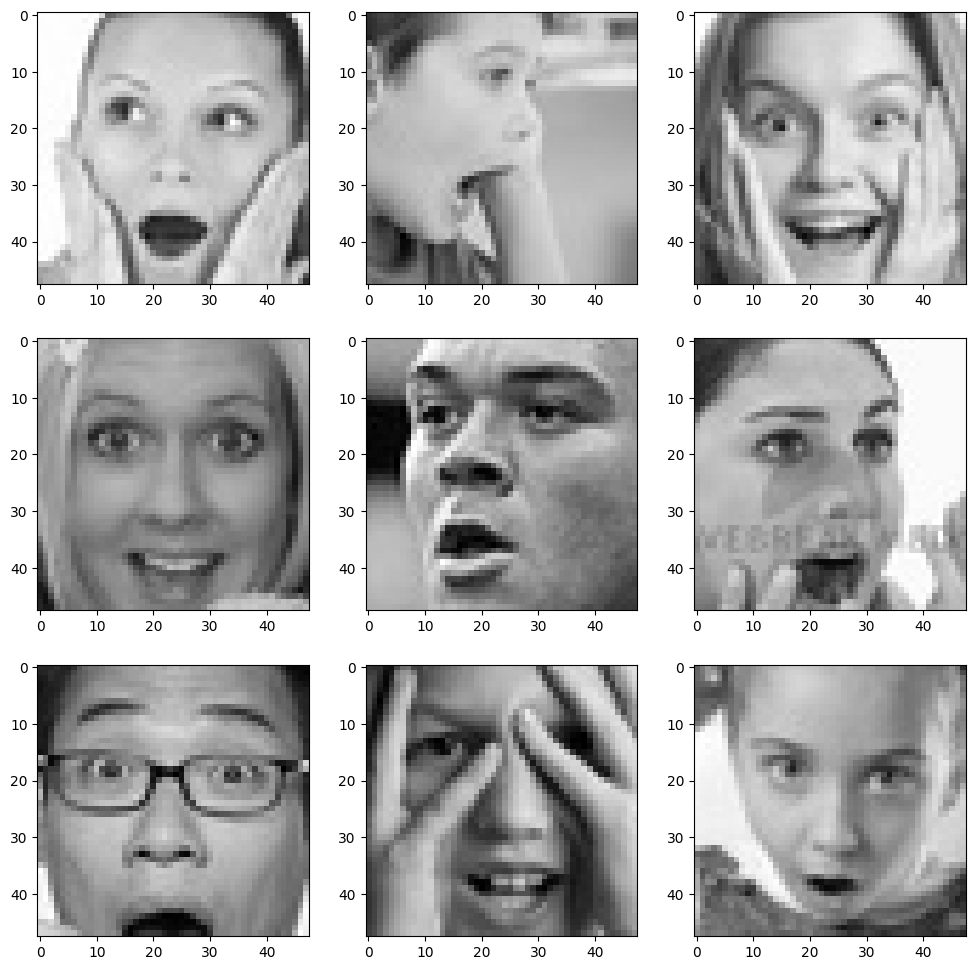

Showing images for: fear


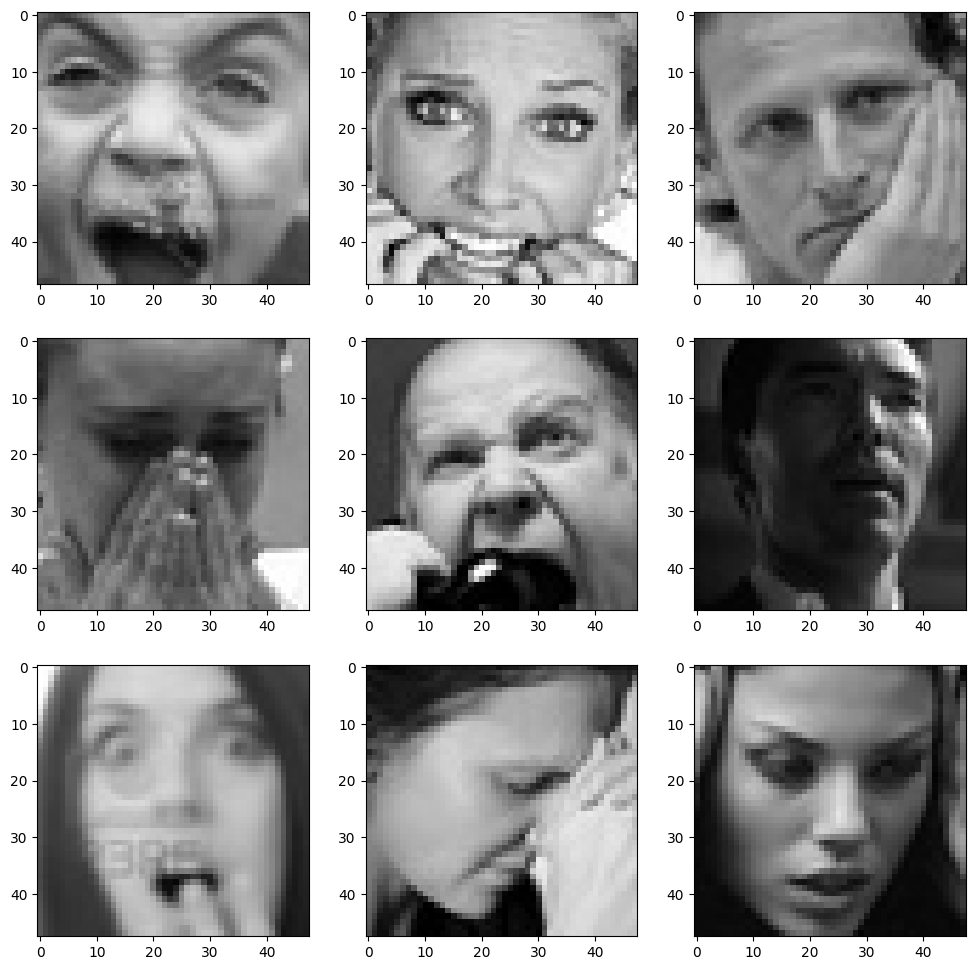

Showing images for: disgust


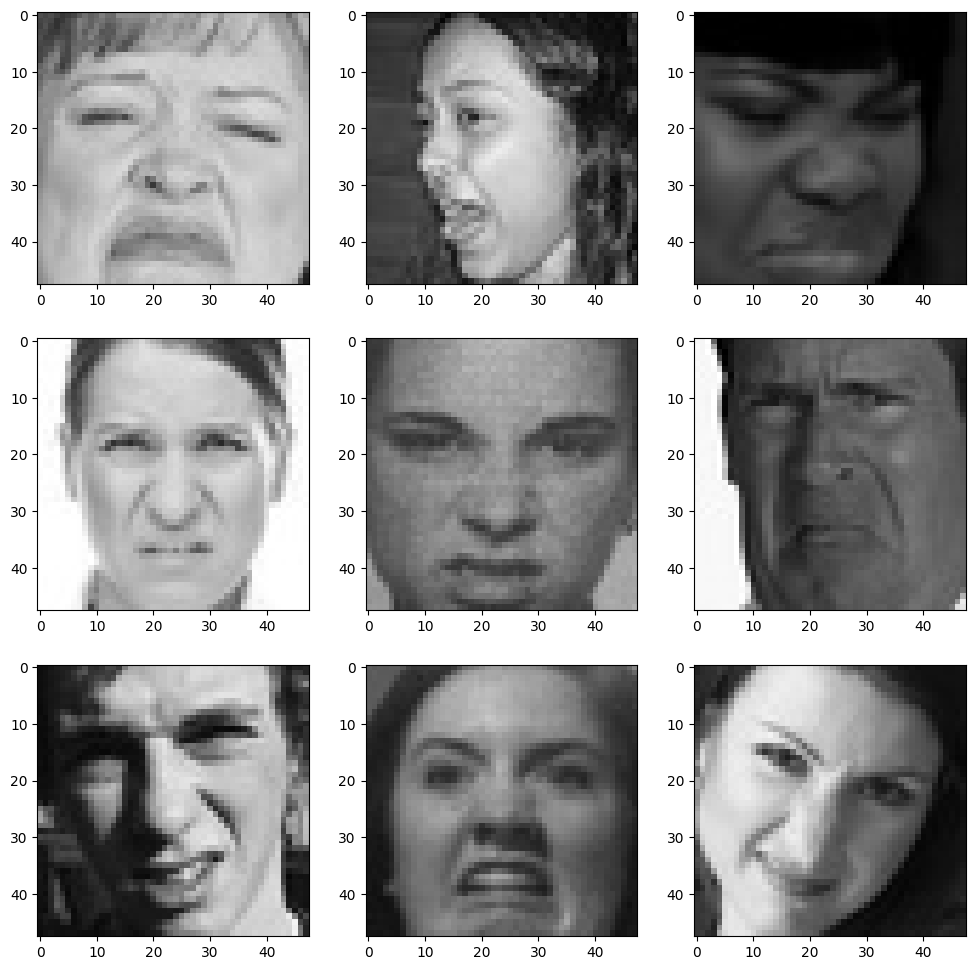

In [ ]:
expressions = ['happy', 'sad', 'angry', 'neutral', 'surprise', 'fear', 'disgust']
plot_all_expressions(folder_path, expressions)

표정별 이미지 개수

4938 sad images
3993 angry images
3205 surprise images
7164 happy images
436 disgust images
4982 neutral images
4103 fear images


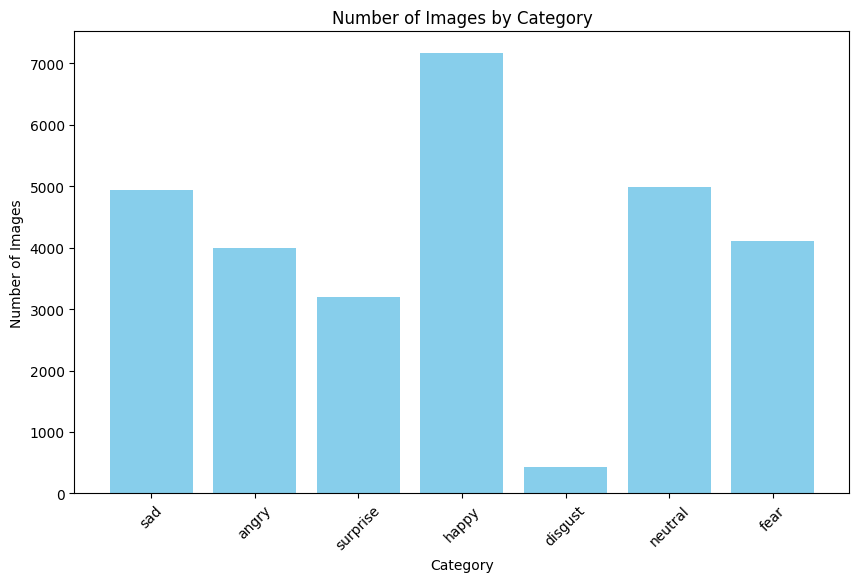

In [ ]:
categories = []
counts = []

for expression in os.listdir(folder_path + "train"):
    count = len(os.listdir(folder_path + "train/" + expression))
    categories.append(expression)
    counts.append(count)
    print(f"{count} {expression} images")

plt.figure(figsize = (10, 6))
plt.bar(categories, counts, color = "skyblue")
plt.title("Number of Images by Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

1139 sad images
960 angry images
797 surprise images
1825 happy images
111 disgust images
1216 neutral images
1018 fear images


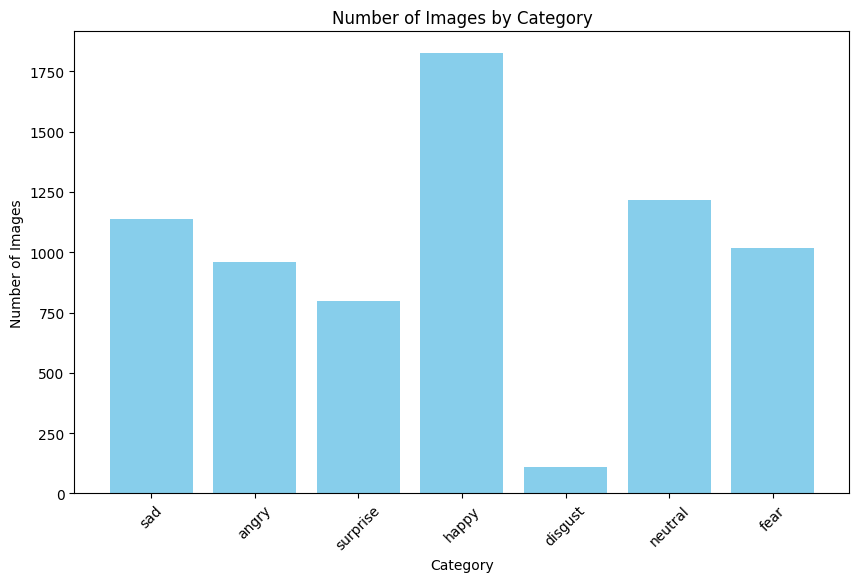

In [ ]:
categories = []
counts = []

for expression in os.listdir(folder_path + "validation"):
    count = len(os.listdir(folder_path + "validation/" + expression))
    categories.append(expression)
    counts.append(count)
    print(f"{count} {expression} images")

plt.figure(figsize = (10, 6))
plt.bar(categories, counts, color = "skyblue")
plt.title("Number of Images by Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
# Disgust 클래스의 이미지를 늘리기 위한 ImageDataGenerator 생성
disgust_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Disgust 클래스의 이미지를 불러와서 데이터 증강 후 저장
disgust_images_path = folder_path + "train/disgust/"
disgust_images = os.listdir(disgust_images_path)

for img_name in disgust_images:
    img_path = os.path.join(disgust_images_path, img_name)
    img = load_img(img_path, target_size=(pic_size, pic_size))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in disgust_datagen.flow(x, batch_size=1,
                                      save_to_dir=disgust_images_path,
                                      save_prefix='aug',
                                      save_format='png'):
        i += 1
        if i >= 2:  # 증강할 이미지 수 조절
            break

# Disgust 클래스의 이미지 개수 다시 확인
disgust_count = len(os.listdir(disgust_images_path))
print(f"Number of Disgust images after augmentation: {disgust_count}")

Number of Disgust images after augmentation: 1257


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., #정규화
                                   rotation_range = 40, #회전
                                   width_shift_range = 0.2, #위치(좌우)
                                   height_shift_range = 0.2, #위치(상하)
                                   shear_range = 0.2, #전단 변형(밀림)
                                   zoom_range = 0.2, #확대, 축소
                                   horizontal_flip = True) #수평으로 뒤집음

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(folder_path + "train",
                                                    target_size = (pic_size, pic_size),
                                                    color_mode = "rgb",
                                                    batch_size = 128,
                                                    class_mode = "categorical",
                                                    shuffle = True)

test_generator = test_datagen.flow_from_directory(folder_path + "validation",
                                                  target_size = (pic_size, pic_size),
                                                  color_mode = "rgb",
                                                  batch_size = 128,
                                                  class_mode = "categorical",
                                                  shuffle = False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


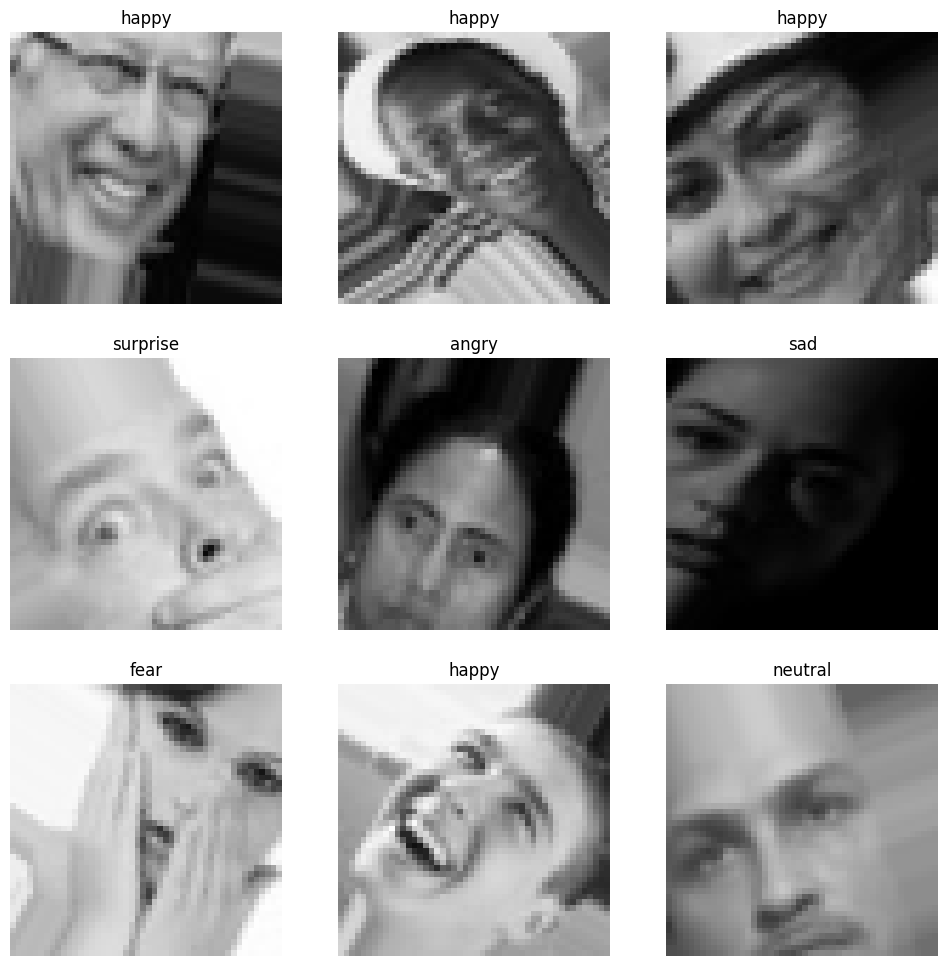

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# train_generator에서 이미지 배치 가져오기
sample_train_batch = next(train_generator)

# 이미지 시각화 함수 정의
def plot_images(images, labels):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 9)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# 클래스 인덱스를 클래스 이름으로 변환
class_labels = list(train_generator.class_indices.keys())
class_indices = np.argmax(sample_train_batch[1], axis=1)
class_names = [class_labels[idx] for idx in class_indices]

# 이미지 시각화
plot_images(sample_train_batch[0], class_names)



-> ImageDataGenerator 역할
>
CNN은 영상의 2차원 변환인 회전(Rotation), 크기(Scale), 밀림(Shearing), 반사(Reflection), 이동(Translation)과 같은 2차원 변환인 Affine Transform에 취약하여 변환된 사진 또는 영상을 다른 자료로 인식한다.
ImageDataGenerator는 Noise삽입, 색상, 밝기 변형 등을 활용하여 실시간으로 데이터 증강을 사용하고, 텐서 이미지 데이터 배치를 생성하여 데이터 학습의 정확도를 높이는 역할을 한다.

## CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam

n_classes = 7

#layer 1
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#layer 2
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#layer 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#layer 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#FC Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#FC Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes,activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

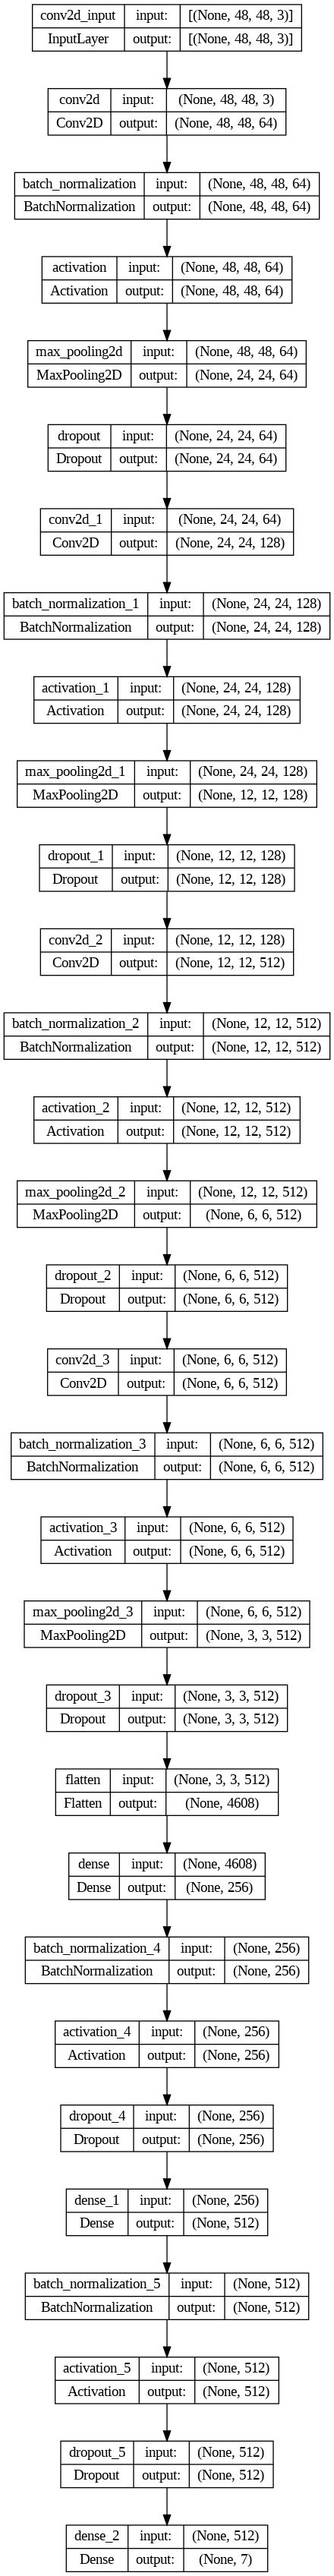

In [ ]:
# 모델 구조
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
epochs = 48
from keras.callbacks import ModelCheckpoint

# 모델 체크포인트 콜백 설정
checkpoint = ModelCheckpoint(
    "model_weights.h5",
    monitor="val_accuracy",  # 'val_accuracy'로 변경
    verbose=1,
    save_best_only=True,
    mode="max"
)

callbacks_list = [checkpoint]

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=callbacks_list
)

Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.9590 - accuracy: 0.2147
Epoch 1: val_accuracy improved from -inf to 0.25923, saving model to model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 1755s 8s/step - loss: 1.9590 - accuracy: 0.2147 - val_loss: 1.8723 - val_accuracy: 0.2592
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.8385 - accuracy: 0.2406
Epoch 2: val_accuracy improved from 0.25923 to 0.26037, saving model to model_weights.h5
225/225 [==============================] - 1745s 8s/step - loss: 1.8385 - accuracy: 0.2406 - val_loss: 1.8671 - val_accuracy: 0.2604
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.7765 - accuracy: 0.2685
Epoch 3: val_accuracy did not improve from 0.26037
225/225 [==============================] - 1725s 8s/step - loss: 1.7765 - accuracy: 0.2685 - val_loss: 1.8526 - val_accuracy: 0.2399
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.7127 - accuracy: 0.3067
Epoch 4: val_accuracy improved from 0.26037 to 0.28821, saving model to model_weights.h5
225/225 [==============================] - 1731s 8s/step - loss: 1.7127 - accuracy: 

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 및 정확도 시각화
plt.figure(figsize=(20, 10))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.title('Training and Validation Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right')

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()

plt.suptitle('Adam Optimizer', fontsize=20)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

# 테스트 데이터셋에 대한 모델의 예측 생성
y_pred = model.predict(test_generator)
ypred_class = np.argmax(y_pred, axis=1)

# 실제 레이블 추출
ytest_class = test_generator.classes

# 혼동 행렬 계산
conf_mat = confusion_matrix(ytest_class, ypred_class)

# 레이블 설정
label = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# 혼동 행렬을 데이터프레임으로 시각화
table = pd.DataFrame(conf_mat, columns=label, index=label)
table

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# 테스트 데이터셋에 대한 모델의 예측 생성
predictions = model.predict(test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = list(test_generator.class_indices.keys())

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 혼동 행렬 계산
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 정규화된 혼동 행렬 시각화
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


In [ ]:
# 새로운 테스트 데이터를 이용하여 CNN 모델 평가하기

from keras.preprocessing.image import ImageDataGenerator

# 경로 설정
new_data_path ='/content/drive/MyDrive/2023-2/test'

# ImageDataGenerator를 사용하여 데이터 로딩 및 전처리 설정
new_data_generator = ImageDataGenerator(rescale=1./255.)

# 새로운 데이터셋을 생성
new_data_generator = new_data_generator.flow_from_directory(
    new_data_path,
    target_size=(pic_size, pic_size),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    shuffle=False  # 셔플 여부는 모델 평가 시에는 중요 X
)

# 새로운 테스트 데이터셋에서 모델 평가
new_data_score = model.evaluate(new_data_generator, verbose=0)
print('New Data Test loss:', new_data_score[0])
print('New Data Test accuracy:', new_data_score[1])


* disgust 분류를 잘 못함 (angry나 neutral로 분류하는 경우가 많음.)

# 1. densenet -121 모델

In [ ]:
from tensorflow.keras.applications import Xception, MobileNetV2, DenseNet121, EfficientNetB2, ResNet101,VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

channels = 3
num_classes = 7
batch_size = 128
picture_size=48

In [ ]:
def get_callbacks(model_name):
    callbacks = []

    # Use correct syntax for ModelCheckpoint
    checkpoint = ModelCheckpoint(filepath=f'model.{model_name}.h5', verbose=1, monitor='val_accuracy', mode='max')
    callbacks.append(checkpoint)

    # Import ReduceLROnPlateau if not imported earlier
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
    callbacks.append(reduce_lr)

    # Import EarlyStopping if not imported earlier
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
    callbacks.append(early_stopping)

    return callbacks

모델을 사용하는데 필요한 패키지들을 불러옴
>
모델의 성능을 최적화하고 과적합을 방지하기 위해 콜백 함수 사용
>
1. ModelCheckpoint: 모델의 가중치 저장. monitor='val_accuracy'는 검증 데이터에 대한 정확도를 기준으로 모델의 성능을 평가한다는 의미, mode='max'는 정확도가 최대일 때 모델을 저장하는 것, verbose=1은 훈련 과정 중 상세한 정보 출력하는 것.
>
2. ReduceLROnPlateau: 모델이 학습하는 동안의 학습률(learning rate) 조정. monitor='val_loss'는 검증 데이터의 손실을 기준으로 학습률을 조절하는 것, factor=0.2는 학습률을 줄일 때 20%까지 감소시킨다는 것, patience=3은 3번의 에폭(epoch) 동안 개선이 없을 경우 학습률을 줄이는 것, min_lr=1e-6은 학습률의 최소값.
>
3. EarlyStopping: 특정 조건이 충족될 때 훈련을 조기에 중단시키는 것. monitor='val_loss'는 검증 데이터의 손실을 기준으로 조기 중단 여부를 결정, patience=7은 7번의 에폭 동안 개선이 없을 경우 훈련을 중단하라는 것, restore_best_weights=True는 가장 좋은 가중치로 모델을 복원.


DenseNet121은 컴퓨터 비전 분야에서 사용되는 심층 신경망 아키텍처의 한 종류("Densely Connected Convolutional Networks" + 121개의 층)
>
DenseNet은 특히 이미지 분류, 객체 탐지 및 세분화 작업과 같은 컴퓨터 비전 태스크에 널리 사용되며, 그 중 DenseNet121은 균형 잡힌 깊이와 복잡성으로 인해 많은 실용적인 응용 분야에서 인기가 높음.
>
DenseNet 아키텍처의 주요 특징은 층 간의 '밀집 연결(Dense Connection)'로, 기존의 컨볼루션 신경망(CNN)에서는 각 층이 이전 층의 출력만을 입력으로 받지만, DenseNet에서는 각 층이 이전 모든 층으로부터의 출력을 입력으로 받음
>
장점
1. 특징 재사용: 각 층이 이전 모든 층의 출력에 접근할 수 있기 때문에, 특징(feature)들이 네트워크 전반에 걸쳐 재사용될 수 있음

2. 효율적인 특징 전달: 밀집 연결은 각 층으로의 특징 전달을 향상시켜, 네트워크가 더 효율적으로 학습될 수 있음

3. 파라미터 효율성: 각 층이 이전 층들의 출력을 직접적으로 활용함으로써 필요한 파라미터의 수가 감소하므로, 모델이 더 적은 파라미터로도 효과적인 학습을 할 수 있게 됨



In [ ]:
# Create DenseNet121 base model
base_model = DenseNet121(input_shape=(picture_size, picture_size, 3), include_top=False, weights='imagenet')

base_model.trainable = True

# Add custom layers on top of the base model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model_DenseNet121 = Model(inputs=base_model.input, outputs=predictions)

model_DenseNet121.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Get callbacks
callbacks = get_callbacks('DenseNet121')

DenseNet121 기본 모델 생성: DenseNet121 함수를 사용하여 기본 모델을 생성합니다. input_shape는 모델이 받아들일 입력 이미지의 크기를 정의합니다. include_top=False는 네트워크의 최상위 층(일반적으로 분류기 층)을 포함하지 않겠다는 의미입니다. weights='imagenet'는 ImageNet 데이터로 미리 훈련된 가중치를 사용하겠다는 것을 의미합니다.

1. 모델 학습 설정: base_model.trainable = True는 전체 모델의 가중치가 훈련 과정에서 업데이트될 수 있게 합니다.

2. 커스텀 층 추가: GlobalAveragePooling2D는 특징 맵의 글로벌 평균 풀링을 수행합니다. 그 후, Dense 층을 사용하여 256개의 뉴런과 ReLU 활성화 함수를 가진 층을 추가합니다. 마지막으로, num_classes개의 출력 뉴런을 가진 Dense 층을 추가하고, softmax 활성화 함수를 사용하여 분류를 수행합니다.

3. 모델 생성: Model 함수를 사용하여 입력으로 base_model.input을, 출력으로 predictions을 가지는 새로운 모델을 생성합니다.

4. 모델 컴파일: 생성한 모델을 compile 메서드로 컴파일합니다. 이 때, 옵티마이저로 Adam을 사용하고, 학습률은 0.001로 설정합니다. 손실 함수로는 categorical_crossentropy를, 성능 지표로는 accuracy를 사용합니다.

5. 콜백 함수 가져오기: 이전에 정의된 get_callbacks 함수를 사용하여 학습 중 적용할 콜백들의 리스트를 가져옵니다. 이 리스트는 모델 체크포인트 저장, 학습률 감소, 조기 종료 등의 기능을 포함할 수 있습니다.

In [ ]:
# Train the model
history_DenseNet121 = model_DenseNet121.fit(
    train_generator,
    epochs=48,
    validation_data=test_generator,
    callbacks=callbacks
    # steps_per_epoch와 validation_steps는 필요에 따라 추가하거나 생략할 수 있음
)

In [ ]:
tr_acc = history_DenseNet121.history['accuracy']
tr_loss = history_DenseNet121.history['loss']
val_acc = history_DenseNet121.history['val_accuracy']
val_loss = history_DenseNet121.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

# 테스트 데이터셋에 대한 모델의 예측 생성
y_pred = model_DenseNet121.predict(test_generator)
ypred_class = np.argmax(y_pred, axis=1)

# 실제 레이블 추출
ytest_class = test_generator.classes

# 혼동 행렬 계산
conf_mat = confusion_matrix(ytest_class, ypred_class)

# 레이블 설정
label = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# 혼동 행렬을 데이터프레임으로 시각화
table = pd.DataFrame(conf_mat, columns=label, index=label)
table

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# 테스트 데이터셋에 대한 모델의 예측 생성
predictions = model_DenseNet121.predict(test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = list(test_generator.class_indices.keys())

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 혼동 행렬 계산
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 정규화된 혼동 행렬 시각화
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
# 새로운 테스트 데이터를 이용하여 Densenet121 모델 평가하기

# 경로 설정
new_data_path = '/content/drive/MyDrive/ESAA_OB/test'

# ImageDataGenerator를 사용하여 데이터 로딩 및 전처리 설정
new_data_generator = ImageDataGenerator(rescale=1./255.)

# 새로운 데이터셋 생성
new_data_generator = new_data_generator.flow_from_directory(
    new_data_path,
    target_size=(picture_size, picture_size),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    shuffle=False  # 셔플 여부는 모델 평가 시에는 중요 X
)

# 새로운 테스트 데이터셋에서 모델 평가
new_data_score = model_DenseNet121.evaluate(new_data_generator, verbose=0)
print('New Data Test loss:', new_data_score[0])
print('New Data Test accuracy:', new_data_score[1])


우리 사진 표정 예측해보기

In [ ]:
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input
import numpy as np

img_path = 'path_to_your_image.jpg'  # 새로운 이미지의 파일 경로
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
emotion_predictions = model_DenseNet121.predict(img_array)

In [ ]:
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_emotion = emotion_labels[np.argmax(emotion_predictions)]
print("Predicted Emotion:", predicted_emotion)